# Fashion MNIST dataset, an alternative to MNIST
datasest : https://keras.io/api/datasets/fashion_mnist

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
import warnings 
warnings.filterwarnings('ignore')

In [2]:
print(tf.__version__)

2.10.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\KIRAN Sonkamble\\AppData\\Roaming\\Python\\Python39\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

In [5]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images.

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |


In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress',
                'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

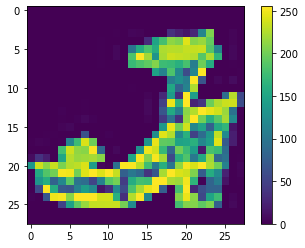

In [7]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[60])
plt.colorbar()
plt.show()

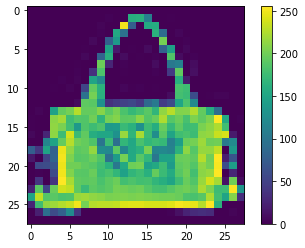

In [8]:
plt.imshow(xtrain[4521])
plt.colorbar()
plt.show()

In [9]:
# import min-max scalar
train_x = xtrain/255
test_x = xtest /255
# else computional cost will be high

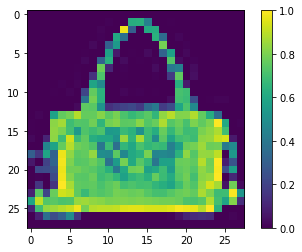

In [10]:
plt.imshow(train_x[4521])
plt.colorbar()
plt.show()

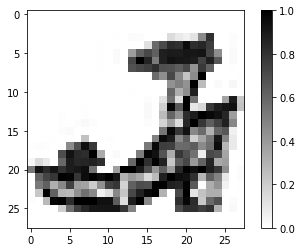

In [11]:
import matplotlib.pyplot as plt
plt.imshow(train_x[60],cmap=plt.cm.binary)
# plt.imshow(train_x[60],cmap='binary')
plt.colorbar()
plt.show()

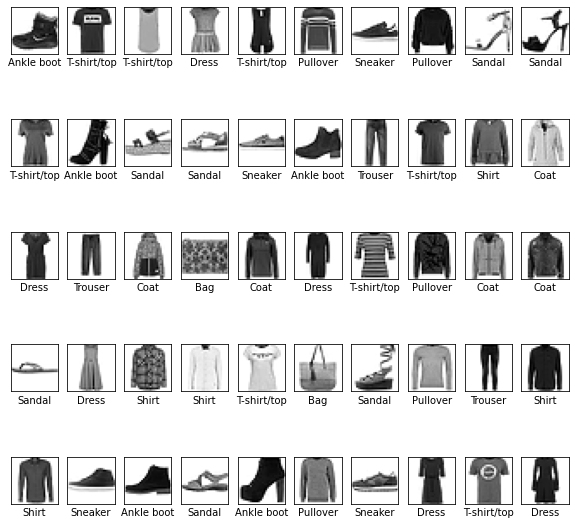

In [12]:
# multiple plots
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(xtrain[i],cmap='binary')
#     no xline notation
    plt.xticks([])
#     no yline notation
    plt.yticks([])
    plt.xlabel(class_names[ytrain[i]])
    
plt.show()

# DNN model 

In [13]:
tf.random.set_seed(100)
tf.keras.backend.clear_session()

# model
model = keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### other way to code DNN

In [14]:
# tf.random.set_seed(100)
# tf.keras.backend.clear_session()

# # model
# model =tf.keras.Sequential(keras.layers.Flatten(input_shape=(28,28)))
# model.add(tf.keras.layers.Dense(units=128,activation='relu'))
# model.add(keras.layers.Dense(units=10))

# model.summary()

In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [17]:
model.fit(xtrain,ytrain,batch_size=100 ,epochs=20)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3594 - accuracy: 0.8675
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3556 - accuracy: 0.8698
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8705
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8694
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8722
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3464 - accuracy: 0.8725
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8708
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8733
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8762
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8763